In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Cargamos los datos
dfDatos = pd.read_csv('airbnb.csv')

In [4]:
#Analizamos tipos de datos
dfDatos.shape

(48377, 16)

In [5]:
dfDatos.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#Se eliminan las columnas innecesarias
dfDatos = dfDatos.drop(columns=['id', 'host_id', 'host_name', 'latitude', 'longitude', 'minimum_nights', 
                                'last_review', 'reviews_per_month'])

In [7]:
dfDatos.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#Calculamos cantidad de valores duplicados
dfDatos.duplicated().sum()

22

In [9]:
#Calculamos cantidad de valores nulos
dfDatos.isnull().sum()

name                              17
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [10]:
#Borramos filas con valores nulos
dfDatos = dfDatos.dropna()

In [11]:
#Comprobamos si quedaron valores nulos
dfDatos.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
#Cantidad de datos restante
dfDatos.shape

(48360, 8)

In [13]:
#Conocemos el formarto de los datos
dfDatos.dtypes

name                              object
neighbourhood_group               object
neighbourhood                     object
room_type                         object
price                              int64
number_of_reviews                  int64
calculated_host_listings_count     int64
availability_365                   int64
dtype: object

In [14]:
dfDatos.head()

,name,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,calculated_host_listings_count,availability_365
0,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,0,1,365
1,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,279,1,192
2,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,9,1,0
3,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,75,1,13
4,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,Private room,60,49,1,0


In [15]:
dfDatos.to_csv('datosairbnb.csv', header=False, index=False)

1. ¿Que tipo de alojamiento es el que mas hay (un cuarto, dept. completo, etc)?

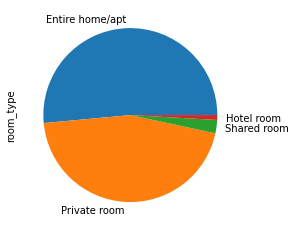

In [17]:
dfDatos.room_type.value_counts(normalize=True).plot.pie()

In [37]:
#plot = dfDatos['room_type'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='% Los tipos de alojamientos que más hay')

2. ¿Cuales son los neighbourhoods con mas alojamientos?

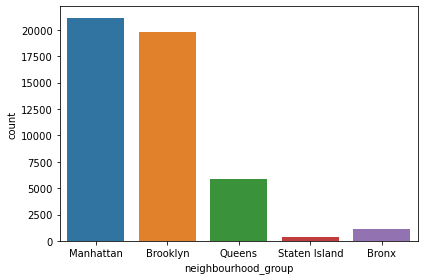

In [38]:
sns.countplot(x="neighbourhood_group",data=dfDatos)
plt.tight_layout()

3. Mostrar los top 5 alojamientos, mas ocupados (tip la columna availability_365 muestra cuantos dias esta disponible)

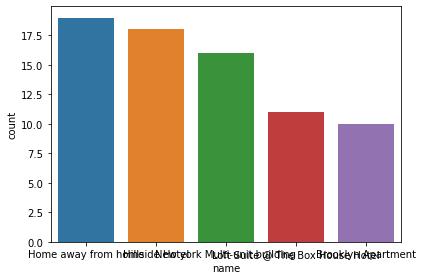

In [39]:
sns.countplot(x="name",data=dfDatos, order = dfDatos['name'].value_counts().iloc[:5].index)
plt.tight_layout()

4. Mostrar el mismo dato del punto 3 pero filtrado por neighbourhood

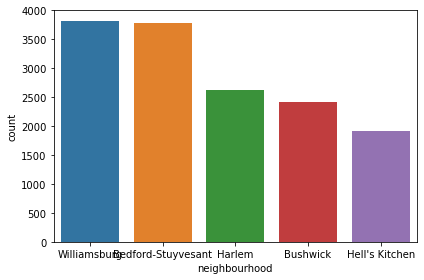

In [40]:
sns.countplot(x="neighbourhood",data=dfDatos, order = dfDatos['neighbourhood'].value_counts().iloc[:5].index)
plt.tight_layout()

5. Mostrar la distribución de los precios de los alojamientos.

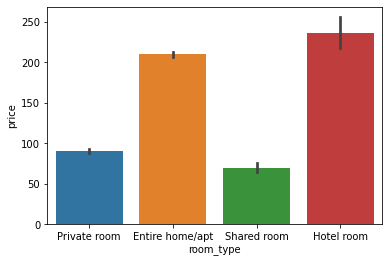

In [41]:
sns.barplot(x='room_type',y='price',data=dfDatos)

6. ¿Donde se encuentran los alojamientos mas caros / baratos?

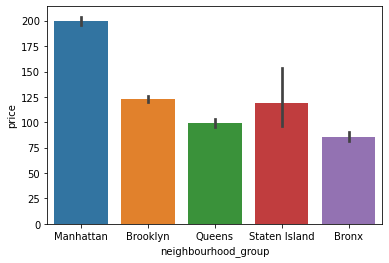

In [42]:
sns.barplot(x='neighbourhood_group',y='price',data=dfDatos)

7. Mostrar los alojamientos en un mapa, filtrados por neighbourhood y por precio ( usar un slider )

8. ¿El precio de renta afecta cuantas veces se renta un lugar?

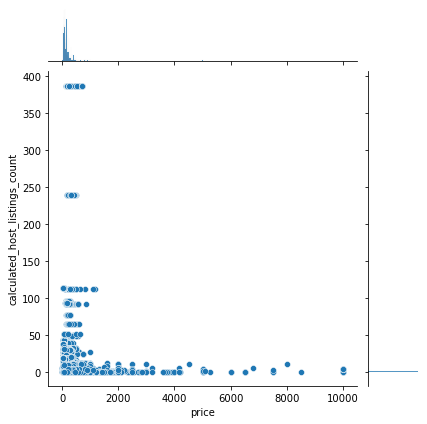

In [43]:
sns.jointplot(x="price",y='calculated_host_listings_count',data=dfDatos)

9. ¿El número de reviews afecta cuantas veces se renta un lugar?

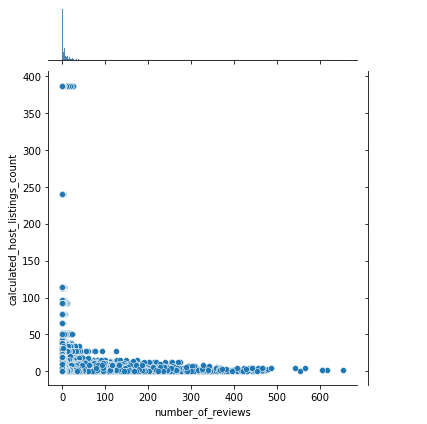

In [44]:
sns.jointplot(x="number_of_reviews",y='calculated_host_listings_count',data=dfDatos)

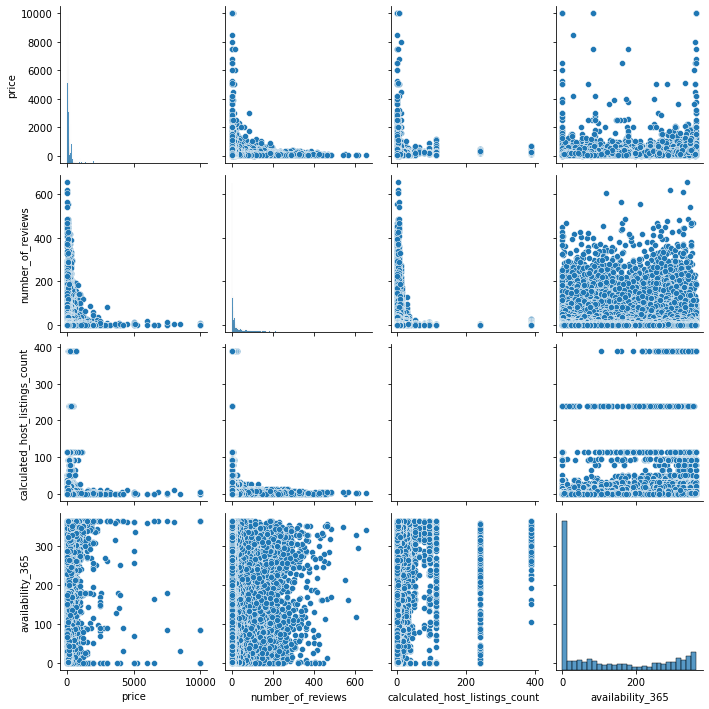

In [45]:
sns.pairplot(dfDatos)

10. ¿El neighbourhood influye en cuantas veces se renta un lugar?




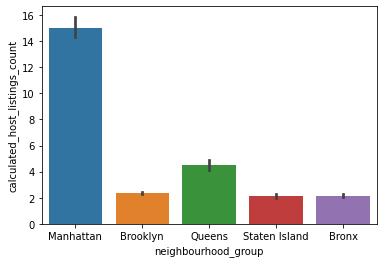

In [46]:
sns.barplot(x='neighbourhood_group',y='calculated_host_listings_count',data=dfDatos)